---
#  Numerical Methods for Solving Newton’s Equations of Motion
---

 <font color="red"> Adapted from : Molecular Simulations Fundamentals and Practice Saman Alavi, WILEY-VCH </font>



## 1. Newton's Laws of Motion <a id='l_newton'></a>

Newton's 2nd law connects the kinematics (movements) of a body with its mechanics (total force acting on it) and defines the dynamic evolution of its position: 

$$m\frac{d^2r(t)}{dt^2} = F = - \nabla{U(r)},$$

where $m$ is the mass, $r$ is the position, $F$ is the force and $U(r)$ is the potential energy, which depends only on the position of the body. 
If one knows the forces acting upon the body, one can find the position of the body at any moment $r(t)$, i.e. predict its dynamics. This can be done by solving Newton's equation of motion. It is a second order ODE that can be solved analytically for a few simple cases: constant force, harmonic oscillator, periodic force, drag force, etc.
However, a more general approach is to use computers in order to solve the ODE numerically.


## 2. Simulation of Dynamics of Particles <a id='l_sims'></a>

There are [many methods](https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations#Methods) for solving ODEs. The second order ODE is transformed to the system of two first order ODEs as follows:

$$\frac{dr(t)}{dt} = v(t)$$

$$m\frac{dv(t)}{dt} = F(t)$$


- In contemporary notation, Newton's second law of motion is expressed as a system of second-order differential equations in time. 
- The solutions to these equations provide the temporal evolution of Cartesian coordinates. For the components $x_i$, $y_i$, and $z_i$ of the position vector $\mathbf{r}_i$ of atom $i$ within an $N$-atom system, Newton's second law is given by:

$$
\begin{cases}
    m_i \frac{d^2x_i}{dt^2} = F_{x,i}(\mathbf{r}) = -\frac{\partial U_i(\mathbf{r})}{\partial x_i} \\
    m_i \frac{d^2y_i}{dt^2} = F_{y,i}(\mathbf{r}) = -\frac{\partial U_i(\mathbf{r})}{\partial y_i} \\
    m_i \frac{d^2z_i}{dt^2} = F_{z,i}(\mathbf{r}) = -\frac{\partial U_i(\mathbf{r})}{\partial z_i}
\end{cases}
$$

Here, $F_i(\mathbf{r})$ represents the force vector acting on atom $i$, which may depend on the set $\mathbf{r}$ of positions of all other atoms in the system.




## 3. The finite difference method

- For systems with complex force functions, the equations given 
cannot be **solved analytically (Algebraic Method)**. 
- In these cases, variants of the **finite difference**
method are the standard approach used to numerically solve the equations
of motion 
- The finite difference method is based on writing the coordinates and velocities of an atom as a Taylor expansion in time.

$$
f(x) = f(a) + (x - a) \cdot \left.\frac{{df}}{{dx}}\right|_{x=a} + \frac{{(x - a)^2}}{{2!}} \cdot \left.\frac{{d^2f}}{{dx^2}}\right|_{x=a} + \frac{{(x - a)^3}}{{3!}} \cdot \left.\frac{{d^3f}}{{dx^3}}\right|_{x=a} + \ldots
$$


In the context of mechanical systems, the Taylor expansion is written for the positions and velocities of particles at time $t$, as a function of their values and their time derivatives at an initial time $t_0$:

$$
r(t) = r(t_0) + \frac{{dr(t)}}{{dt}} \Bigg|_{t=t_0} (t - t_0) + \frac{1}{2} \frac{{d^2r(t)}}{{dt^2}} \Bigg|_{t=t_0} (t - t_0)^2 + \frac{1}{6} \frac{{d^3r(t)}}{{dt^3}} \Bigg|_{t=t_0} (t - t_0)^3 + \ldots 
$$

$$
v(t) = v(t_0) + \frac{{dv(t)}}{{dt}} \Bigg|_{t=t_0} (t - t_0) + \frac{1}{2} \frac{{d^2v(t)}}{{dt^2}} \Bigg|_{t=t_0} (t - t_0)^2 + \frac{1}{6} \frac{{d^3v(t)}}{{dt^3}} \Bigg|_{t=t_0} (t - t_0)^3 + \ldots 
$$

The velocity $\frac{{dr(t)}}{{dt}} = v(t)$ and acceleration $\frac{{d^2r(t)}}{{dt^2}} = \frac{{dv(t)}}{{dt}} = a(t)$ are two of the time derivatives 


 <font color="blue"> The advantage in writing the Taylor expansion for the position and velocity is that the acceleration, through Newton's second law,  is a known function of the positions. </font> : $a(t) = \frac{{F[r(t)]}}{m}$


### 3.1 Taylor Expansion and the Finite Difference Method

-  In the context of mechanical systems, the Taylor expansion is written for the positions and velocities of particles at time $t$, as a function of their values and their time derivatives at an initial time $t_0$.
-  However, there is no systematic way to relate its value to positions and velocities.
-  When $(t - t_0)$ is large, the series expansions may require many terms to converge
- The finite difference method overcomes this challenge by approximating the derivatives using small (infinitesimal) time differences, $\Delta t = t - t_0$.
- This choice ensures that $(\Delta t)^n$ becomes increasingly smaller for successive terms in the expansion.


#### Truncation Errors and Properties of Numerical Algorithms

<details>
  <summary>Click to expand table</summary>
  
  | Numerical Algorithm | Quantity (r or v) | Local Truncation Error | Global Truncation Error | Time-reversal Symmetric | Symplectic |
  |----------------------|-------------------|------------------------|-------------------------|------------------------|------------|
  | Euler                | r                 | $\mathcal{O}(\Delta t)$    | $\mathcal{O}(\Delta t)$     | No                     | No         |
  |                      | v                 | $\mathcal{O}(\Delta t)$    | $\mathcal{O}(\Delta t)$     | No                     | No         |
  | Verlet               | r                 | $\mathcal{O}(\Delta t^2)$  | $\mathcal{O}(\Delta t^2)$   | Yes                    | Yes        |
  |                      | v                 | $\mathcal{O}(\Delta t)$    | $\mathcal{O}(\Delta t)$     | Yes                    | Yes        |
  | Leapfrog             | r                 | $\mathcal{O}(\Delta t^3)$  | $\mathcal{O}(\Delta t^2)$   | Yes                    | Yes        |
  |                      | v                 | $\mathcal{O}(\Delta t^2)$  | $\mathcal{O}(\Delta t)$     | Yes                    | Yes        |
  | Velocity Verlet      | r                 | $\mathcal{O}(\Delta t^2)$  | $\mathcal{O}(\Delta t^2)$   | Yes                    | Yes        |
  |                      | v                 | $\mathcal{O}(\Delta t^2)$  | $\mathcal{O}(\Delta t^2)$   | Yes                    | Yes        |
  
</details>



### 3.2  The Euler Method

- The Euler method, a variant of the finite difference method, is employed for the numerical solution of equations of motion.
- It estimates the particle motion based on their current positions and velocities.
- Given initial conditions $\mathbf{r}(t_0)$ and $\mathbf{v}(t_0)$ at time $t_0$, the Euler method updates the positions and velocities as follows:
$$
\begin{align*}
			\mathbf{r}(t_0 + \Delta t) &= \mathbf{r}(t_0) + \Delta t \cdot \mathbf{v}(t_0) \\
			\mathbf{v}(t_0 + \Delta t) &= \mathbf{v}(t_0) + \Delta t \cdot \frac{{\mathbf{F}(t_0)}}{m}
\end{align*}
$$

or 

$$ v_{n+1} = v_n + \frac{F_n}{m} dt$$

$$ r_{n+1} = r_n + v_{n+1} dt$$

Here we discretize time t with time step $dt$, so $t_{n+1} = t_n + dt$, and $r_{n} = r(t_n)$, $v_{n} = v(t_n)$, where $n$ is the timestep number

### 3.2  Verlet Algorithm

#### Taylor Expansion of Position
- Consider the Taylor expansion of the position $r(t)$:
\begin{align*}
    r(t + \Delta t) &= r(t) + \Delta t \cdot v(t) + \frac{{(\Delta t)^2}}{{2!}} \cdot a(t) + \frac{{(\Delta t)^3}}{{3!}} \cdot \frac{{d^3r}}{{dt^3}}(t) + \ldots
\end{align*}

- Similarly, the Taylor expansion of $x(t - \Delta t)$ can be written as:
\begin{align*}
    r(t - \Delta t) &= r(t) - \Delta t \cdot v(t) + \frac{{(\Delta t)^2}}{{2!}} \cdot a(t) - \frac{{(\Delta t)^3}}{{3!}} \cdot \frac{{d^3r}}{{dt^3}}(t) + \ldots
\end{align*}

- By rearranging these equations, we can derive the Verlet algorithm equations for position and velocity updates.

#### Position and Velocity Update Equations
- **Position update equation:**
\begin{align*}
    r(t + \Delta t) &= 2r(t) - r(t - \Delta t) + (\Delta t)^2 \cdot a(t) 
\end{align*}

- **Velocity update equation ( Störmer–Verlet method):**
\begin{align*}
    v(t) &= \frac{{r(t + \Delta t) - r(t - \Delta t)}}{{2\Delta t}} 
\end{align*}




These equations provide an improved approximation of the particle's position and velocity compared to the simple Euler method.


### 3.3  The Leapfrog Algorithm

- The Leapfrog algorithm addresses some issues in the Verlet algorithm while maintaining the same accuracy.
- By using the central difference method for velocity, the Leapfrog algorithm improves stability and energy conservation.
- The Taylor expansion of the velocity is written for half-time steps: $1/2\Delta t$ and $-1/2\Delta t$.
- Subtracting these two equations gives:

\begin{align*}
v(t + \frac{\Delta t}{2}) - v(t - \frac{\Delta t}{2}) = \Delta t \cdot a(t)
\end{align*}


In leapfrog integration, the equations for updating position and velocity are as follows:

\begin{align*}
v_{i+1/2} &= v_{i-1/2} + a_{i}\, \Delta t, \\
r_{i+1} &= r_{i} + v_{i+1/2}\, \Delta t,
\end{align*}

where $r_i$ is the position at step $i$, $v_{i+1/2}$ is the velocity (first derivative of $r$) at step $i+1/2$, $a_{i}$ is the acceleration (second derivative of $r$) at step $i$, and $ \Delta t$ is the size of each time step. 

These equations can be expressed in a form that gives velocity at integer steps as well

\begin{align*}
r_{i+1} &= r_i + v_i\, \Delta t + \tfrac{1}{2}\,a_i\, \Delta t^{\,2}, \\
v_{i+1} &= v_i + \tfrac{1}{2}(a_i + a_{i+1})\,\Delta t.
\end{align*}

However, in this synchronized form, the time-step $ \Delta t$ must be constant to maintain stability.

The synchronized form can be re-arranged to the 'kick-drift-kick' form:

\begin{align*}
v_{i+1/2} &= v_i + a_i \frac{\Delta t}{2}, \\
r_{i+1} &= r_i + v_{i+1/2}\Delta t, \\
v_{i+1} &= v_{i+1/2} + a_{i+1} \frac{\Delta t}{2},
\end{align*}


### 3.4 The Velocity Verlet Algorithm

- The Velocity Verlet algorithm is another popular numerical integration method in molecular dynamics simulations.
- It improves upon the Leapfrog algorithm by considering a full time step for both position and velocity updates.
- The position update equation is similar to the Leapfrog algorithm:
\begin{align*}
r(t + \Delta t) = r(t) + \Delta t \cdot v(t) + \frac{\Delta t^2}{2} \cdot a(t)
\end{align*}
- The velocity update equation is modified to include both the initial and updated accelerations:
\begin{align*}
v(t + \Delta t) = v(t) + \frac{\Delta t}{2} \cdot (a(t) + a(t + \Delta t))
\end{align*}


# 4. Assigment : One-Dimensional Harmonic Oscillator

Consider a simple harmonic oscillator described by the following equation of motion:
$$
 m \frac{{d^2\xi}}{{dt^2}} + k\xi = 0
 $$
 
where $m$ is the mass and $k$ is the spring constant.



  ### Task

  Implement a Python program to find and plot the `analytical solutions` for a harmonic oscillator, as well as the numerical solutions from the `Euler method`, `Verlet algorithm`, and `Leapfrog algorithm`. Compare the results.

  ### Instructions

  1. Implement the analytical solution for the harmonic oscillator.
  2. Implement the Euler method, Verlet algorithm, and Leapfrog algorithm for numerical integration.
  3. Calculate and plot the positions over a suitable time interval for all methods.
  4. Compare the results to analyze the accuracy and behavior of each method.


  - The angular frequency of the harmonic oscillator: $\omega = \sqrt{\frac{k}{m}} = 5.0 \, \text{s}^{-1}$
  - Initial displacement and velocity: $\xi(t_0) = 0$, $v(t_0) = 1.0 \, \text{m/s}$
  - The period associated with the harmonic oscillator: $\tau = 1.257 \, \text{seconds}$
  - Simulation time step: $\Delta t = \frac{\tau}{10} = 0.1257 \, \text{seconds}$
  - $m$ = 1 kg
  



---
#  Solution
---

## Given parameters

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Given parameters
m = 1.0  # mass (kg)
k = 25.0  # spring constant (N/m)
omega = np.sqrt(k / m)  # angular frequency (1/s)
xi_0 = 0.0  # initial displacement (m)
v_0 = 1.0  # initial velocity (m/s)
tau = 1.257  # period (s)
delta_t = tau / 10.0  # time step (s)
total_time = 1 * tau  # total simulation time (s)

# Time points
t = np.arange(0, total_time, delta_t)

## Analytical solution for harmonic oscillator

In [2]:
# Analytical solution for harmonic oscillator
xi_analytical = xi_0 * np.cos(omega * t) + (v_0 / omega) * np.sin(omega * t)
v_analytical = -xi_0 * omega * np.sin(omega * t) + v_0 * np.cos(omega * t)

## Euler Method

  - In terms of displacement, $\xi$ the equations of motion for a one-dimensional harmonic oscillator using the Euler method are as follows:
  

  \begin{align*}
  \xi(t_0 + \Delta t) &= \xi(t_0) + v(t_0)\Delta t - \frac{\omega^2}{2}\xi(t_0)(\Delta t)^2 \\
  v(t_0 + \Delta t) &= v(t_0) - \omega^2\xi(t_0)\Delta t
  \end{align*}

  where $\frac{{dv(t)}}{{dt}} = a(t) = -\frac{{k\xi(t)}}{{m}} = -\omega^2\xi(t).$

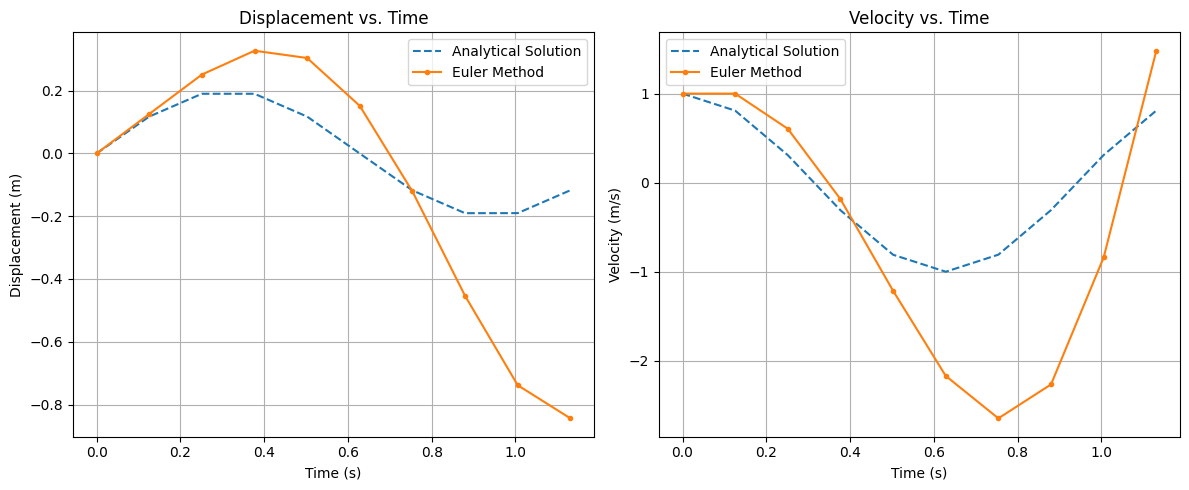

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# Given parameters
m = 1.0  # mass (kg)
k = 25.0  # spring constant (N/m)
omega = np.sqrt(k / m)  # angular frequency (1/s)
xi_0 = 0.0  # initial displacement (m)
v_0 = 1.0  # initial velocity (m/s)
tau = 1.257  # period (s)
delta_t = tau / 10.0  # time step (s)
total_time = 1 * tau  # total simulation time (s)

# Time points
t = np.arange(0, total_time, delta_t)


# Analytical solution for harmonic oscillator
xi_analytical = xi_0 * np.cos(omega * t) + (v_0 / omega) * np.sin(omega * t)
v_analytical = -xi_0 * omega * np.sin(omega * t) + v_0 * np.cos(omega * t)

# Numerical solution using the Euler method
xi_euler = np.zeros(len(t))
v_euler = np.zeros(len(t))
xi_euler[0] = xi_0
v_euler[0] = v_0

## Run dynamics:
for i in range(len(t)-1):
    xi_euler[i+1] = xi_euler[i ] + v_euler[i ] * delta_t
    v_euler[i+1] = v_euler[i ] - omega ** 2 * xi_euler[i] * delta_t

# Create subplots for displacement and velocity
plt.figure(figsize=(12, 5))

# Subplot 1: Displacement
plt.subplot(1, 2, 1)
plt.plot(t, xi_analytical, label='Analytical Solution', linestyle='--')
plt.plot(t, xi_euler, label='Euler Method', marker='o', markersize=3)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Displacement vs. Time')
plt.legend()
plt.grid(True)

# Subplot 2: Velocity
plt.subplot(1, 2, 2)
plt.plot(t, v_analytical, label='Analytical Solution', linestyle='--')
plt.plot(t, v_euler, label='Euler Method', marker='o', markersize=3)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs. Time')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()



## Q1. Bonus

1.  How does the position change over time?

The position oscillates in one direction (+) at first, and then changes directions (-), which makes sense as this is a harmonic oscillator which has an analytical solution of sinusoids.

2. What is the amplitude of the oscillation?

The Euler approximation has an amplitude of ~0.6 m, whereas the analytical solution has an amplitude of 0.2 m

3. How does the velocity change over time?

The velocity changes directions. It starts off positive, then steadily decreases until it becomes negative (velocity in the opposite direction), and then eventually becomes positive again.

4. What is the period of the oscillation?

The period of oscillation in the analytical solution is 1.257 seconds. In the Euler approximation it is difficult to tell by the graph alone, but by extrapolating it appears to be ~1.6 seconds.

5. How does changing the mass and spring constant affect the motion?

$\omega = \sqrt(k/m)$, $T = 2\pi/\omega$, amplitude $= v_0/\omega$
Therefore, changing m and k affects omega (frequency), which in turn affects the period and amplitude of the oscillations/motion/change in position. Increasing mass decreases omega which increases the period and amplitude of motion. Increasing spring constant increases omega which decreases the period and amplitude of motion.

Physically, this means something heavier will take longer for its motion to oscillate through space, and the oscillations will be larger. It also means something that takes more force to 'stretch' through space (higher k)  will have short oscillation times and the oscillations will be shorter

## Q2. The Verlet Algorithm



Position update:
$$
\xi(t + \Delta t) = 2\xi(t) - \xi(t - \Delta t) - \omega^2\xi(t)(\Delta t)^2
$$



Velocity update:
$$
v(t ) = \frac{\xi(t + \Delta t) - \xi(t - \Delta t )}{ 2\Delta t}
$$




###  write you code here

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
m = 1.0  # mass (kg)
k = 25.0  # spring constant (N/m)
omega = np.sqrt(k / m)  # angular frequency (1/s)
xi_0 = 0.0  # initial displacement (m)
v_0 = 1.0  # initial velocity (m/s)
tau = 1.257  # period (s)
delta_t = tau / 10.0  # time step (s)
total_time = 1 * tau  # total simulation time (s)

# Time points
t = np.arange(0, total_time, delta_t)


# Analytical solution for harmonic oscillator
xi_analytical = xi_0 * np.cos(omega * t) + (v_0 / omega) * np.sin(omega * t)
v_analytical = -xi_0 * omega * np.sin(omega * t) + v_0 * np.cos(omega * t)

In [5]:
# write you code here

# Initialize arrays for Verlet method
xi_verlet = np.zeros(len(t))
v_verlet = np.zeros(len(t))

# Initial conditions
xi_verlet[0] = xi_0
xi_verlet[1] = xi_verlet[0] + v_0 * delta_t - 0.5 * omega**2 * xi_verlet[0] * (delta_t**2)
v_verlet[0] = v_0


# Verlet method
for i in range(len(t)-1):
    if i > 0:
        xi_verlet[i+1] = 2*xi_verlet[i] - xi_verlet[i-1] - (omega**2)*xi_verlet[i]*(delta_t**2)
        v_verlet[i] = (xi_verlet[i+1] - xi_verlet[i-1])/(2*delta_t)
        
# Backwards finite difference for last velocity step
v_verlet[-1] = (xi_verlet[-1] - xi_verlet[-2])/(delta_t)


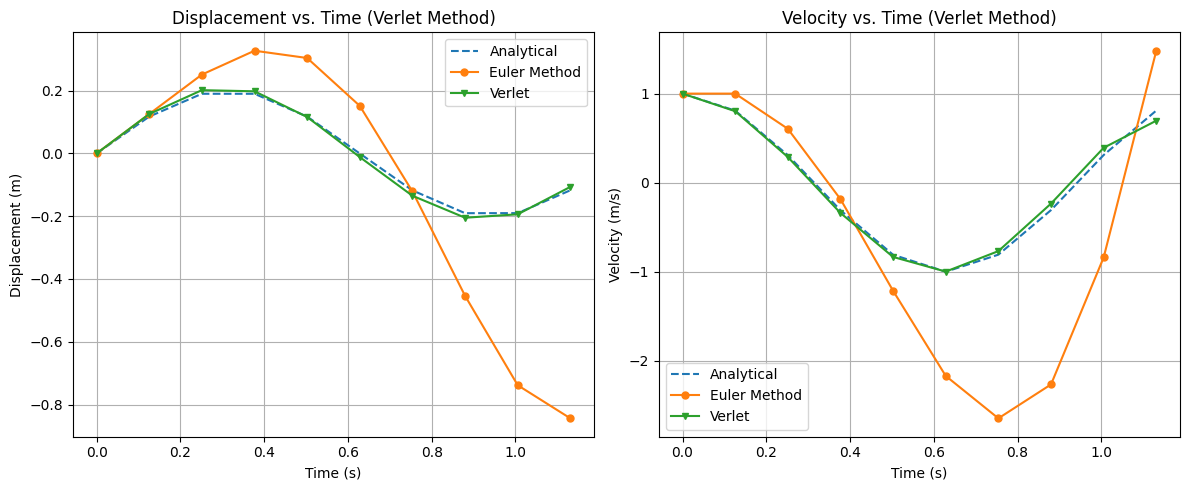

In [6]:
# Create plots for displacement and velocity
plt.figure(figsize=(12, 5))

# Displacement vs. Time
plt.subplot(1, 2, 1)
plt.plot(t, xi_analytical, label='Analytical', linestyle='--')
plt.plot(t, xi_euler, label='Euler Method', marker='o', markersize=5)
plt.plot(t, xi_verlet, label='Verlet', marker='v', markersize=5)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Displacement vs. Time (Verlet Method)')
plt.legend()
plt.grid(True)

# Velocity vs. Time (excluding the last time point)
plt.subplot(1, 2, 2)
plt.plot(t, v_analytical, label='Analytical', linestyle='--')
plt.plot(t, v_euler, label='Euler Method', marker='o', markersize=5)
plt.plot(t, v_verlet, label='Verlet', marker='v', markersize=5)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs. Time (Verlet Method)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Q3. The Leapfrog Algorithm



Position update:
$$
\xi(t + \Delta t) = \xi(t - \Delta t) + 2v(t)\Delta t - \omega^2\xi(t)(\Delta t)^2
$$

Velocity update:
$$
v(t + \Delta t) = v(t - \Delta t) - \omega^2\xi(t)\Delta t
$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
m = 1.0  # mass (kg)
k = 25.0  # spring constant (N/m)
omega = np.sqrt(k / m)  # angular frequency (1/s)
xi_0 = 0.0  # initial displacement (m)
v_0 = 1.0  # initial velocity (m/s)
tau = 1.257  # period (s)
delta_t = tau / 10.0  # time step (s)
total_time = 1 * tau  # total simulation time (s)

# Time points
t = np.arange(0, total_time, delta_t)


# Analytical solution for harmonic oscillator
xi_analytical = xi_0 * np.cos(omega * t) + (v_0 / omega) * np.sin(omega * t)
v_analytical = -xi_0 * omega * np.sin(omega * t) + v_0 * np.cos(omega * t)

###  write you code here

In [8]:
# write you code here

# Initialize arrays for Leapfrog method
xi_leapfrog = np.zeros(len(t))
v_leapfrog = np.zeros(len(t))

# Initial conditions
xi_leapfrog[0] = xi_0
v_leapfrog[0] = v_0


# Leapfrog method
for i in range(len(t)-1):
    v_halft = v_leapfrog[i] - 0.5*(omega**2)*xi_leapfrog[i]*delta_t
    xi_leapfrog[i+1] = xi_leapfrog[i] + v_halft*delta_t
    v_leapfrog[i+1] = v_halft - 0.5*(omega**2)*xi_leapfrog[i+1]*delta_t


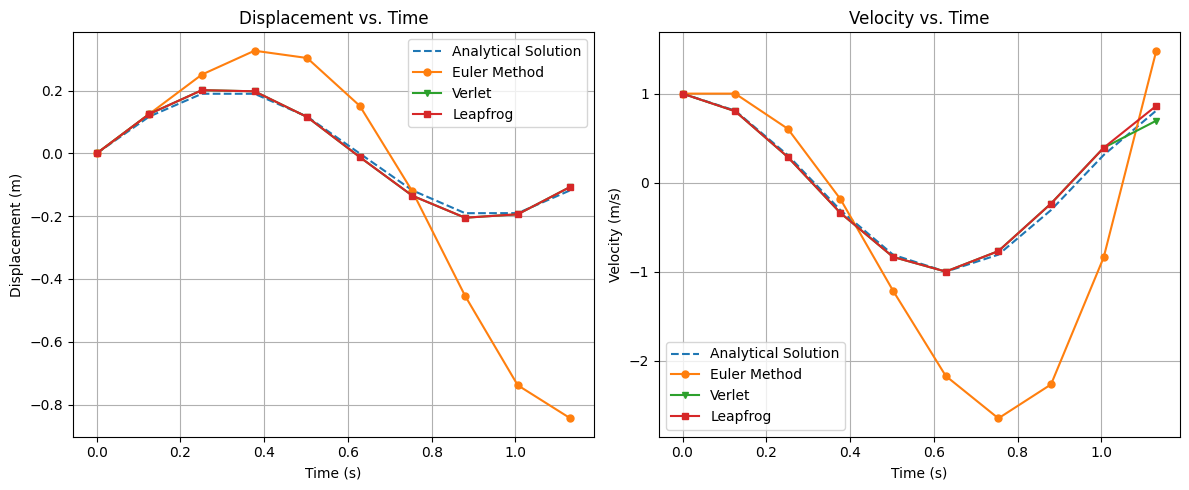

In [9]:
# Create subplots for displacement and velocity
plt.figure(figsize=(12, 5))

# Subplot 1: Displacement
plt.subplot(1, 2, 1)
plt.plot(t, xi_analytical, label='Analytical Solution', linestyle='--')
plt.plot(t, xi_euler, label='Euler Method', marker='o', markersize=5)
plt.plot(t, xi_verlet, label='Verlet', marker='v', markersize=5)
plt.plot(t, xi_leapfrog, label='Leapfrog', marker='s', markersize=5)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Displacement vs. Time')
plt.legend()
plt.grid(True)

# Subplot 2: Velocity
plt.subplot(1, 2, 2)
plt.plot(t, v_analytical, label='Analytical Solution', linestyle='--')
plt.plot(t, v_euler, label='Euler Method', marker='o', markersize=5)
plt.plot(t, v_verlet, label='Verlet', marker='v', markersize=5)
plt.plot(t, v_leapfrog, label='Leapfrog', marker='s', markersize=5)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs. Time')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()